In [217]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm
import matplotlib.animation as animation


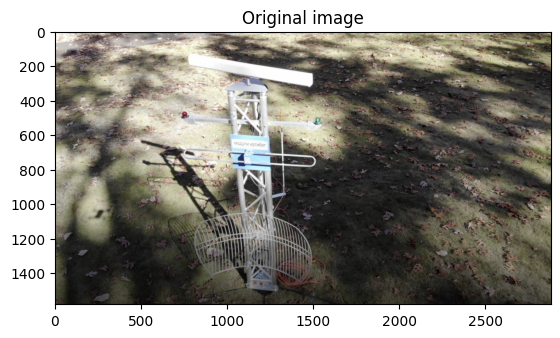

In [225]:
#import and show image
image = cv.imread("mast_frame.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original image')
plt.show()

image = cv.cvtColor(image,cv.COLOR_RGB2BGR)

# cv.imshow("test",image)
# cv.waitKey(0)
# cv.destroyAllWindows()


The corner points are...

A : [1077, 715]
B : [1172, 546]
C : [1324, 724]
D : [1534, 11]


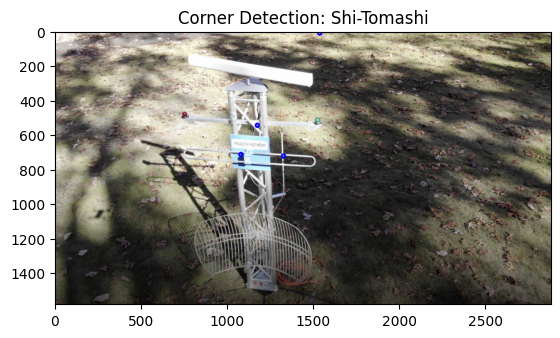

[[1077, 715], [1172, 546], [1324, 724], [1534, 11]]

In [226]:
#testing shi_tomasi
def shi_tomasi(image, radius = -1, show_plots = False):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    # blur = cv.GaussianBlur(gray,(5,5),0)
    blur = cv.bilateralFilter(gray,9,75,75)
    corners = cv.goodFeaturesToTrack(blur, 4, 0.01, 100)
    corners = np.int0(corners)
    corners = sorted(np.concatenate(corners).tolist())
    
    if show_plots :
        print('\nThe corner points are...\n')

        im = image.copy()
        for index, c in enumerate(corners):
            x, y = c
            cv.circle(im, (x, y), 10, (255,0,0), radius)
            if show_plots :
                character = chr(65 + index)
                print(character, ':', c)

    
        plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
        plt.title('Corner Detection: Shi-Tomashi')
        plt.show()
        
    return corners

shi_tomasi(image, radius = 10, show_plots=True)

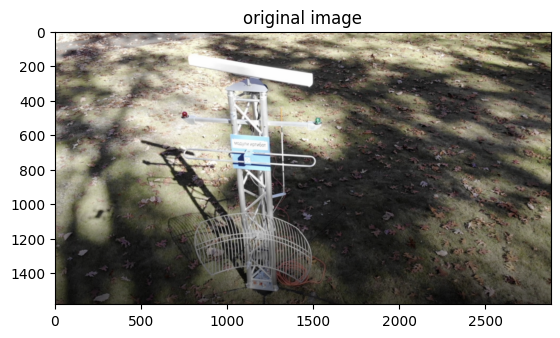

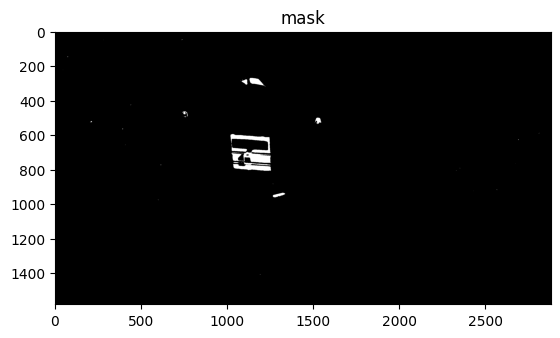

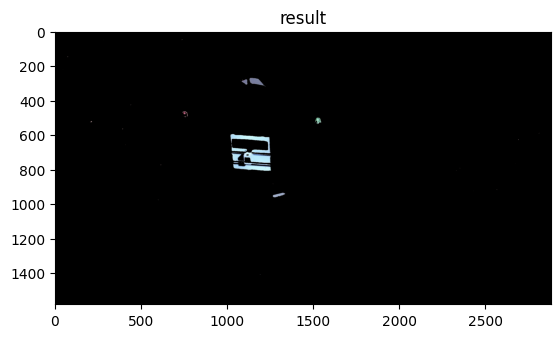

In [232]:
#color filter
def hsv_filter(image, lower = (60,35,140), upper = (180,255,255), show_plots = False):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Threshold of blue in HSV space
    lower_blue = np.array(lower)
    upper_blue = np.array(upper)
    # lower_blue = np.array([110,50,50])
    # upper_blue = np.array([130,255,255])

    # preparing the mask to overlay
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # mask = cv.cvtColor(image.)

    # The black region in the mask has the value of 0,
    # so when multiplied with original image removes all non-blue regions
    result = cv.bitwise_and(image, image, mask = mask)

    # mask = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
    # result = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # result = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # plt.subplot(311)
    if show_plots:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        plt.title("original image")
        plt.show()

        # plt.subplot(312)
        plt.imshow(mask, cmap="gray")
        plt.title("mask")
        plt.show()

        # plt.subplot(313)
        plt.imshow(result)
        plt.title("result")
        plt.show()
        
    return result, mask
    # cv.imshow('result',result)
blur = cv.GaussianBlur(image,(5,5),0)
color_filtered, mask = hsv_filter(blur,show_plots=True)


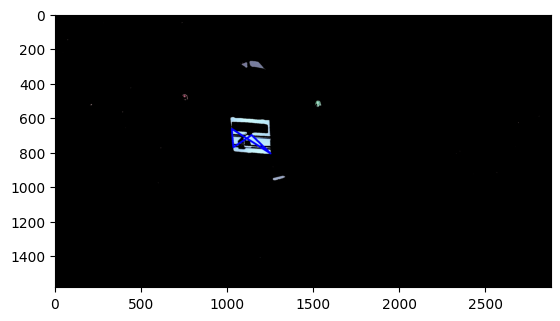

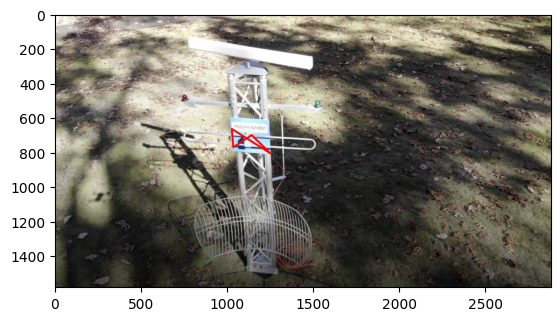

In [233]:
#testing shi_tomasi on color filtered image
corners = shi_tomasi(color_filtered)

#draw shape on image
pts = np.array(corners)
pts = pts.reshape((-1,1,2))
# print(pts)
cv.polylines(color_filtered,[pts],True,(0,0,255),10)

im = image.copy()
cv.polylines(im,[pts],True,(0,0,255),10)

plt.imshow(color_filtered)
plt.show()
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.show()

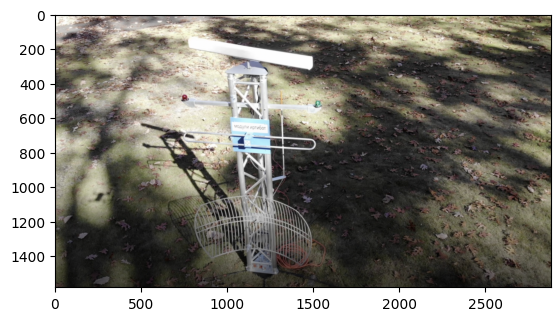

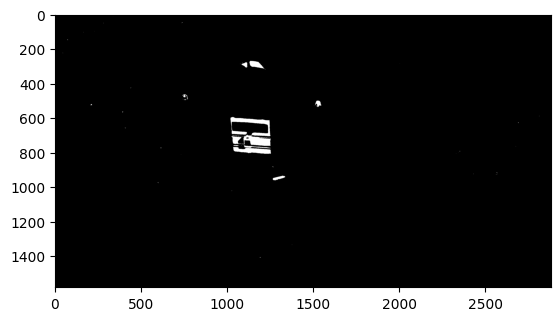

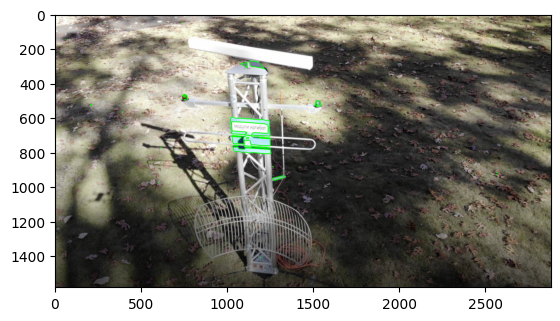

contours found =  68


In [234]:
#test countours
# imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# ret, thresh = cv.threshold(imgray, 127, 255, 0)

hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
lower_blue = np.array((60,35,140))
upper_blue = np.array((180,255,255))

# preparing the mask to overlay
mask = cv.inRange(hsv, lower_blue, upper_blue)

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(mask, cmap = "gray")
plt.show()

im = image.copy()
contour_img = cv.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(cv.cvtColor(contour_img, cv.COLOR_BGR2RGB))
plt.show()

print('contours found = ', len(contours))

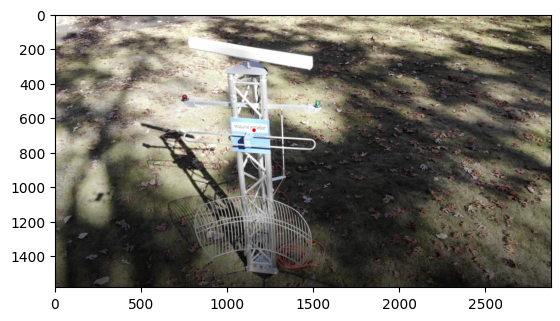

cX =  1153
cY =  673


In [235]:
#test finding center with mask
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
lower_blue = np.array((60,35,140))
upper_blue = np.array((180,255,255))

# preparing the mask to overlay
mask = cv.inRange(hsv, lower_blue, upper_blue)
M = cv.moments(mask)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
 
# put text and highlight the center
im = image.copy()
cv.circle(im, (cX, cY), 10, (0, 0, 255), -1)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.show()

print('cX = ',cX)
print('cY = ',cY)
# cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

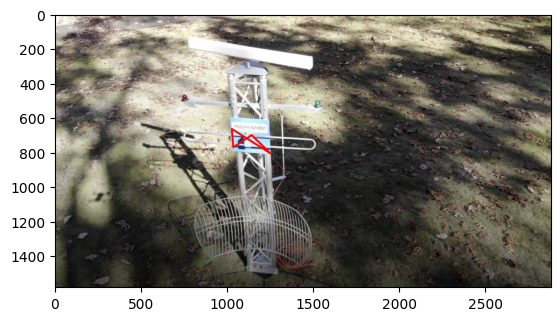

In [236]:
def draw_polygon_on_frame(image):
    color_filterd, mask = hsv_filter(image)
    track_corners = shi_tomasi(color_filtered, radius = 10)
    im = image.copy()
    cv.polylines(im,[pts],True,(0,0,255),10)
    return im
tracked_img = draw_polygon_on_frame(image)
plt.imshow(cv.cvtColor(tracked_img,cv.COLOR_BGR2RGB))

width =  1920.0
height =  1080.0


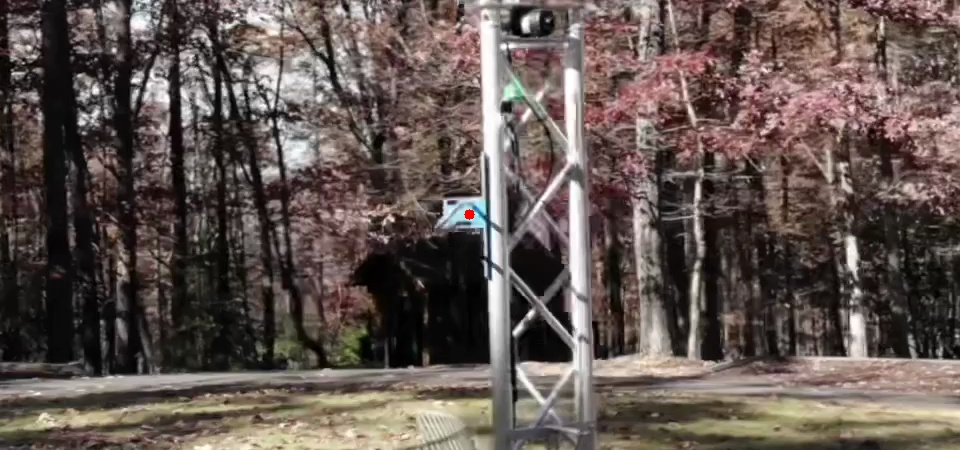

TypeError: 'NoneType' object is not subscriptable

In [281]:
#test video
from IPython.display import display, Image
import time

cap = cv.VideoCapture('test_videos/test1.mp4')
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
print('width = ', width)
print('height = ', height)
display_handle=display(None, display_id=True)
while(cap.isOpened()):
    ret, frame = cap.read()
#     frame = draw_polygon_on_frame(frame)
#     frame = cv.GaussianBlur(frame,(5,5),0)

    #crop out sky
    frame = frame[int(height/3):int(3*height/4), int(width/4):int(3*width/4)]
    
    #filter to only take in blue
    color_filtered, mask= hsv_filter(frame, lower = (77,35,140), upper = (130,255,255))
    color_filtered = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    
    # calculate x,y coordinate of center
    M = cv.moments(mask)
    
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv.circle(frame, (cX, cY), 5, (0, 0, 255), -1)
    
#     corners = shi_tomasi(frame)
#     pts = np.array(corners)
#     pts = pts.reshape((-1,1,2))
    # print(pts)
#     cv.polylines(frame,[pts],True,(0,0,255),10)
    _, frame = cv.imencode('.jpeg', frame)
    display_handle.update(Image(data=frame.tobytes()))
    time.sleep(.01)
cap.release()
display_handle.update(None)

In [113]:
#test with video

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

cap = cv.VideoCapture('test_videos/test1.mp4')
frame_width = cap.get(3)
frame_height = cap.get(4)

video = cv.VideoWriter('output_test.avi',cv.VideoWriter_fourcc('M','J','P','G'), 10, 
                       (frame_width,frame_height))

img = []
frames = []

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    fig = plt.figure()
    plt.imshow(img[i], cmap=cm.Greys_r)

    # put pixel buffer in numpy array
    canvas = FigureCanvas(fig)
    canvas.draw()
    mat = np.array(canvas.renderer._renderer)
    mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)

    # write frame to video
    video.write(mat)

cap.release()


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'VideoWriter'
> Overload resolution failed:
>  - Can't parse 'frameSize'. Sequence item with index 0 has a wrong type
>  - VideoWriter() missing required argument 'frameSize' (pos 5)
>  - VideoWriter() missing required argument 'params' (pos 5)
>  - VideoWriter() missing required argument 'frameSize' (pos 5)
